## 2.4.4 Challenge: make your own regression model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

In [2]:
#Data
df = pd.read_csv('ny_off.csv')
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [3]:
df.dtypes

City                             object
Population                       object
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                          object
Aggravated\nassault              object
Property\ncrime                  object
Burglary                         object
Larceny-\ntheft                  object
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [4]:
#Replace "," with nothing
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted

In [5]:
df.fillna(0)
df['Population'] = df['Population'].apply(lambda x: convert_number(x))
df['Murder'] = df['Murder'].apply(lambda x: convert_number(x))
df['Robbery'] = df['Robbery'].apply(lambda x: convert_number(x))
df['Property\ncrime'] = df['Property\ncrime'].apply(lambda x: convert_number(x))
df['Larceny-\ntheft'] = df['Larceny-\ntheft'].apply(lambda x: convert_number(x))

In [6]:
df.dtypes

City                             object
Population                      float64
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                         float64
Aggravated\nassault              object
Property\ncrime                 float64
Burglary                         object
Larceny-\ntheft                 float64
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [7]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan


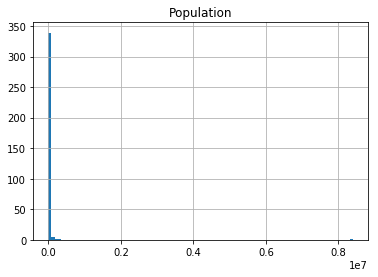

Median  7233.5
Std  450037.3675209857
Outliers above  907308.2350419714


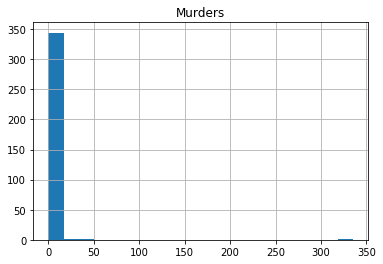

Median  0.0
Std  18.303672792887784
Outliers above  36.60734558577557


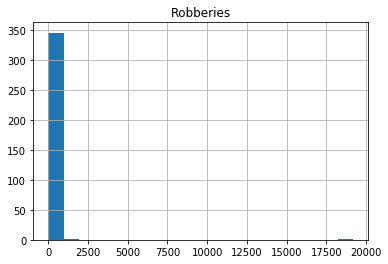

Median  1.0
Std  1031.032873295524
Outliers above  2063.065746591048


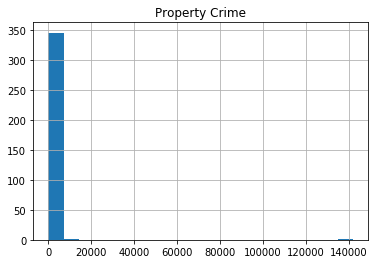

Median  112.5
Std  7659.724745633146
Outliers above  15431.949491266292


In [8]:
#Distributions of variables
df['Population'].hist(bins=100)
plt.title('Population')
plt.show()

#Median, standard deviation and the limit for outliers
median = df.Population.median()
std = df.Population.std()
pop_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)

df['Murder'].hist(bins=20)
plt.title('Murders')
plt.show()

median = df['Murder'].median()
std = df['Murder'].std()
mur_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', mur_out)

df['Robbery'].hist(bins=20)
plt.title('Robberies')
plt.show()

median = df.Robbery.median()
std = df.Robbery.std()
rob_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', rob_out)

df['Property\ncrime'].hist(bins=20)
plt.title('Property Crime')
plt.show()

median = df['Property\ncrime'].median()
std = df['Property\ncrime'].std()
prop_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', prop_out)

##### Some outliers must be removed.

In [9]:
#Turning outliers into None
df['Population'] = df.Population.map(lambda x: x if x < pop_out else None)
df['Murder'] = df.Murder.map(lambda x: x if x < mur_out else None)
df['Robbery'] = df.Robbery.map(lambda x: x if x < rob_out else None)
df['Property\ncrime'] = df['Property\ncrime'].map(lambda x: x if x < prop_out else None)

In [10]:
#Highest values
print(df.Population.dropna().sort_values(ascending=False).head())
print(df['Murder'].dropna().sort_values(ascending=False).head())
print(df.Robbery.dropna().sort_values(ascending=False).head())
print(df['Property\ncrime'].dropna().sort_values(ascending=False).head())

35    258789.000
272   210562.000
346   199134.000
310   143834.000
7     118296.000
Name: Population, dtype: float64
310   21.000
140   10.000
3      8.000
285    8.000
321    7.000
Name: Murder, dtype: float64
35    1322.000
272    918.000
310    400.000
346    390.000
206    228.000
Name: Robbery, dtype: float64
35    12491.000
272   10051.000
310    6473.000
3      4090.000
218    2807.000
Name: Property\ncrime, dtype: float64


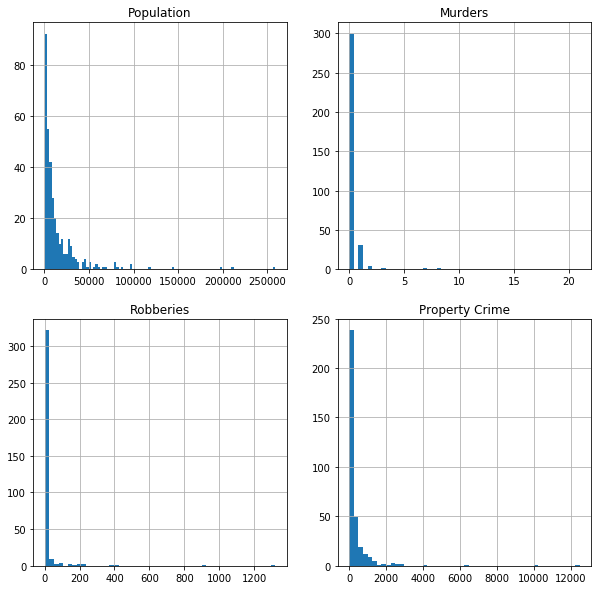

In [11]:
#Post outlier removal
plt.figure(figsize=(10,10))
plt.subplot(221)
df['Population'].hist(bins=100)
plt.title('Population')

plt.subplot(222)
df['Murder'].hist(bins=50)
plt.title('Murders')

plt.subplot(223)
df['Robbery'].hist(bins=50)
plt.title('Robberies')

plt.subplot(224)
df['Property\ncrime'].hist(bins=50)
plt.title('Property Crime')

plt.show()

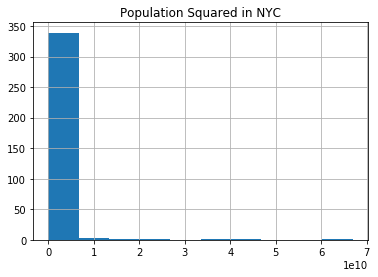

In [12]:
#Feature: Population squared
df['PopSq'] = df['Population']**2
df['PopSq'].hist()
plt.title('Population Squared in NYC')
plt.show()

In [13]:
#Defining categorical converting function

def convert_category(number):
    value = convert_number(number)
    
    if value>0:
        return 1
    else:
        return 0

In [14]:
#Converting "Murder" and "Robbery" into categorical

df['Murder_categorical'] = df['Murder'].apply(lambda x: convert_category(x))
df['Robbery_categorical'] = df['Robbery'].apply(lambda x: convert_category(x))
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopSq,Murder_categorical,Robbery_categorical
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000,3463321.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000,6640929.000,0,0
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000,8099716.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan,9595377936.000,1,1
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan,40806544.000,0,1


In [15]:
#Isolating features
features = df[['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical', 'Property\ncrime']].dropna()
features.head()

,Population,PopSq,Murder_categorical,Robbery_categorical,Property crime
0,1861.000,3463321.000,0,0,12.000
1,2577.000,6640929.000,0,0,24.000
2,2846.000,8099716.000,0,0,16.000
3,97956.000,9595377936.000,1,1,4090.000
4,6388.000,40806544.000,0,1,223.000


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 5 columns):
Population             347 non-null float64
PopSq                  347 non-null float64
Murder_categorical     347 non-null int64
Robbery_categorical    347 non-null int64
Property
crime         347 non-null float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


In [17]:
# Instantiate our model.
regr = linear_model.LinearRegression()
Y = features['Property\ncrime']
X = features[['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical']]

# Fit our model to our data.
regr.fit(X, Y)

# Display the attributes we calculated.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n')
print(regr.score(X, Y))


Coefficients: 
 [  1.40107315e-02   1.13425350e-07   8.42401093e+01   1.00084978e+02]

Intercept: 
 -20.7925867491

R-squared: 

0.842104946287


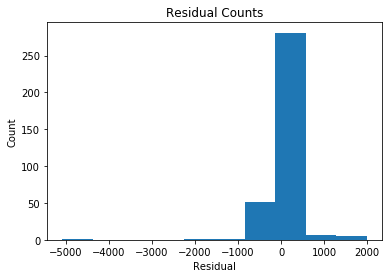

In [18]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Counts')
plt.show()

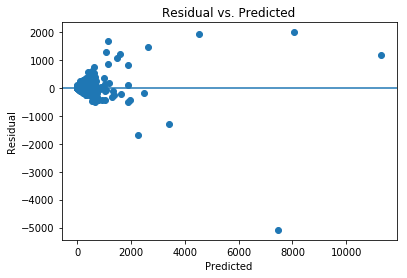

In [19]:
#Homoscedasicity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [20]:
#Correlation Matrix
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,PopSq,Murder_categorical,Robbery_categorical
Population,1.000,0.889,0.374,0.344
PopSq,0.889,1.000,0.167,0.152
Murder_categorical,0.374,0.167,1.000,0.302
Robbery_categorical,0.344,0.152,0.302,1.000


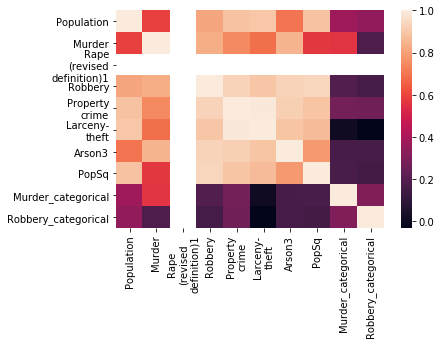

In [21]:
sns.heatmap(df.corr())

## PCA

In [22]:
# PCA of highly correlated variables.
features_pca = df.loc[:, ['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical', 
                          'Property\ncrime']].dropna()

In [23]:
# Normalize the data so all vars have a mean of 0 and a standard deviation of 1.
X = StandardScaler().fit_transform(features_pca)

In [24]:
# The NumPy covariance function assumes that variables are reprensented by rows, not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00289017  0.89115011  0.37542126  0.34534177  0.88981975]
 [ 0.89115011  1.00289017  0.16796569  0.15272868  0.89603845]
 [ 0.37542126  0.16796569  1.00289017  0.30310431  0.27316692]
 [ 0.34534177  0.15272868  0.30310431  1.00289017  0.26754044]
 [ 0.88981975  0.89603845  0.27316692  0.26754044  1.00289017]]


In [25]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [26]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'compenent calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.5558971 ]
 [ 0.52282868]
 [ 0.2554688 ]
 [ 0.24357424]
 [ 0.54132787]]
Eigenvalue 1: 3.0313732182090027
----------------------------------------
Eigenvector 2: 
[[ 0.649926  ]
 [-0.72251421]
 [-0.13626966]
 [-0.12129309]
 [ 0.14929158]]
Eigenvalue 2: 0.07344263080272004
----------------------------------------
Eigenvector 3: 
[[  5.12729616e-01]
 [  2.99980617e-01]
 [ -2.60817767e-02]
 [  1.44864003e-04]
 [ -8.04014733e-01]]
Eigenvalue 3: 0.10993988785388538
----------------------------------------
Eigenvector 4: 
[[-0.07463649]
 [-0.33838018]
 [ 0.63819055]
 [ 0.65942219]
 [-0.19443108]]
Eigenvalue 4: 1.099891269218083
----------------------------------------
Eigenvector 5: 
[[ 0.01059929]
 [-0.01157013]
 [ 0.71288065]
 [-0.70080092]
 [-0.02080927]]
Eigenvalue 5: 0.6998038609683336
----------------------------------------
The percentage of total variance in the dataset explained by each compenent calculated by hand.
 [ 0.60452745  0.0146462   0.02192461  0.2193443

We keep components with an Eigenvalue > 1, that is Eigenvectors 1 and 4

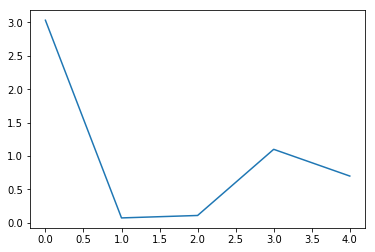

In [27]:
plt.plot(eig_val_cov)
plt.show()

The scree plot and the eigenvalues > 1 rule agree that we should keep only the first component.

In [28]:
# Instantiate our model.
regr = linear_model.LinearRegression()
Y = features['Property\ncrime']
X = features[['Population', 'Robbery_categorical']]

# Fit our model to our data.
regr.fit(X, Y)

# Display the attributes we calculated.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n')
print(regr.score(X, Y))


Coefficients: 
 [  3.44683301e-02  -9.26764247e+01]

Intercept: 
 -108.695715157

R-squared: 

0.788926106275


Using the features that resulted from de PCA analysis, we get a R-squared value very similar to the result using 50% more of the components available. This means that 78 % of the time the model explains the variability of the dependent variable with the independent variables, in this case two.

## Splitting data

In [29]:
data = X
target = Y

In [30]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [31]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.0142857142857
Testing on Sample: 0.0259365994236


In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=6)

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


array([ 0.00420168,  0.01538462,  0.03571429,  0.09090909,  0.25      ,  1.        ])

In [33]:
y_true = Y

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[6, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

The scores of the cross validation fluctuate, indicating that the model is overfitting, so probably the features chosen, aren't the most indicated. I'm not sure if did correctly the confusion matrix, since I'm not able to interpret it.